<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/HousePricePredictionClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv("/content/House_Price_Prediction_Dataset[1].csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [ ]:
x = df.drop(['Condition', 'Garage'], axis = 1)

In [ ]:
categorical = df[['Condition','Garage']]
categorical.head()

,Condition,Garage
0,Excellent,No
1,Excellent,No
2,Good,No
3,Fair,Yes
4,Fair,Yes


In [ ]:
cat_numerical = pd.get_dummies(categorical,drop_first=True,dtype=int)
cat_numerical.head()

,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,1,0,0,1
4,1,0,0,1


In [ ]:
X = pd.concat([x, cat_numerical], axis = 1)
X.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Price,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1,1360,5,4,3,1970,Downtown,149919,0,0,0,0
1,2,4272,5,4,3,1958,Downtown,424998,0,0,0,0
2,3,3592,2,2,3,1938,Downtown,266746,0,1,0,0
3,4,966,4,2,2,1902,Suburban,244020,1,0,0,1
4,5,4926,1,4,2,1975,Downtown,636056,1,0,0,1


In [ ]:
features = X.drop(["Location"], axis=1)
labels = X.filter(["Location"], axis = 1)
features.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1,1360,5,4,3,1970,149919,0,0,0,0
1,2,4272,5,4,3,1958,424998,0,0,0,0
2,3,3592,2,2,3,1938,266746,0,1,0,0
3,4,966,4,2,2,1902,244020,1,0,0,1
4,5,4926,1,4,2,1975,636056,1,0,0,1


In [ ]:
features = features.values
km_model = KMeans(n_clusters = 5)
km_model.fit(features)

KMeans(n_clusters=5)

In [ ]:
print(km_model.labels_)

[2 4 4 ... 0 2 0]


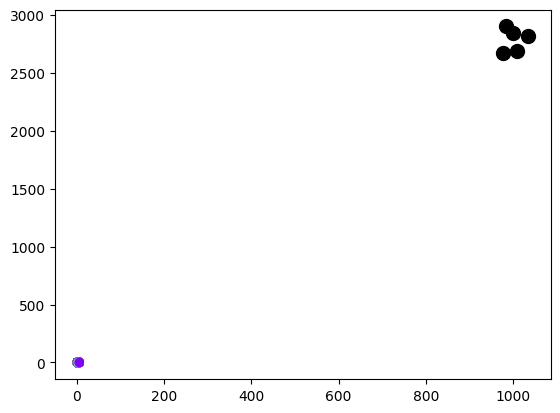

In [ ]:
plt.scatter(features[:,2],features[:,9],c=km_model.labels_,cmap = 'rainbow')
plt.scatter(km_model.cluster_centers_[:,0] , km_model.cluster_centers_[:,1],s =100 , c = 'black')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_num = le.fit_transform(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
print("ARI = " , adjusted_rand_score(labels_num, km_model.labels_ ))

ARI =  -3.159746958607768e-05


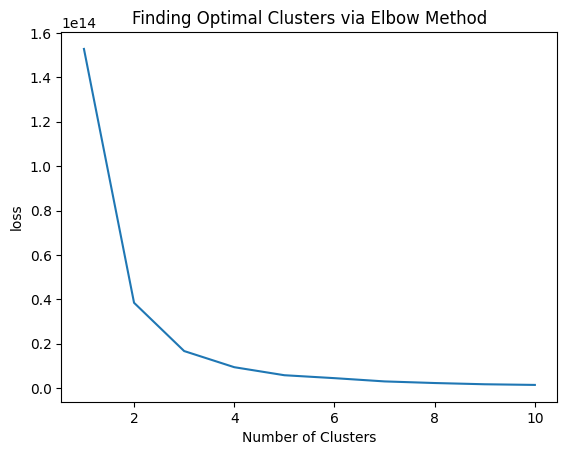

In [ ]:
loss = []
for i in range (1, 11):
  km = KMeans(n_clusters= i).fit(features)
  loss.append(km.inertia_)
#printing loss against number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1 ,11), loss)
plt.title('Finding Optimal Clusters via Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('loss')
plt.show()

In [ ]:
km_model = KMeans(n_clusters = 3)
km_model.fit(features)

KMeans(n_clusters=3)

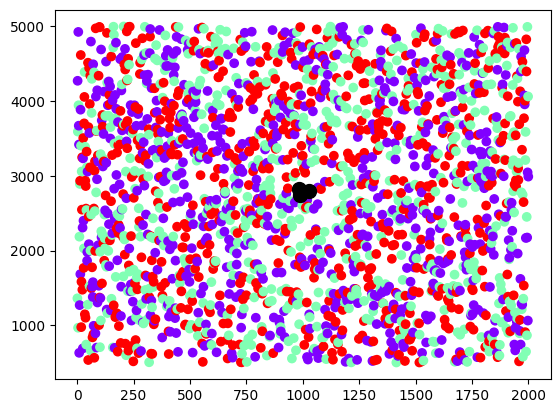

In [ ]:
plt.scatter(features [:,0] , features[:,1] , c = km_model.labels_, cmap = 'rainbow' )
# p r i n t t h e p r e d i c t e d c e n t r o i d s
plt.scatter(km_model.cluster_centers_[:,0] , km_model.cluster_centers_[:,1] , s = 100 , c = 'black')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


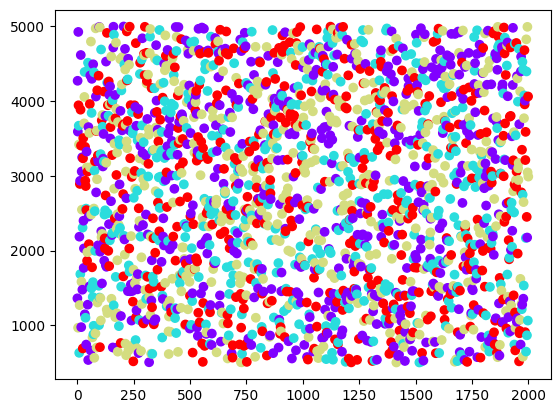

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
#print the datapoints with original
labels
plt.scatter(features[:,0] ,features[:,1], c = labels, cmap = 'rainbow')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels_num = le.fit_transform(labels)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
#adjusted_rand_score(labels_true, labels_pred)
print("ARI = " ,adjusted_rand_score(labels_num, km_model.labels_ ))

ARI =  -0.00014660611986743838


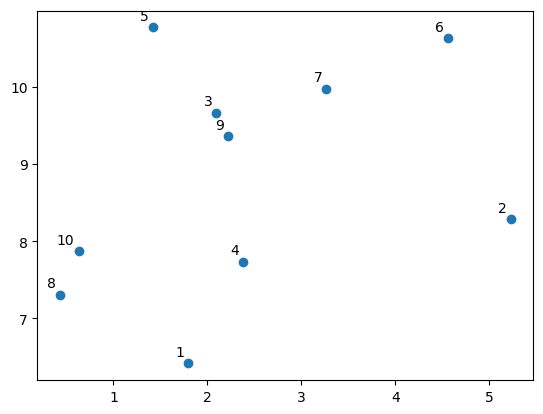

In [ ]:
#generating dummy data of 10 record switch 2 clusters
features ,labels = make_blobs(n_samples = 10, centers = 2, cluster_std = 2.00)
#plotting the dummy data
plt.scatter(features[:,0], features[:,1])
#adding number sto data points
annots = range(1, 11)
for label,x ,y in zip(annots , features[:,0],features[:,1]):
  plt.annotate(label, xy = (x, y) , xytext = (-3, 3) , textcoords = 'offset points' , ha = 'right' , va = 'bottom')
plt.show()

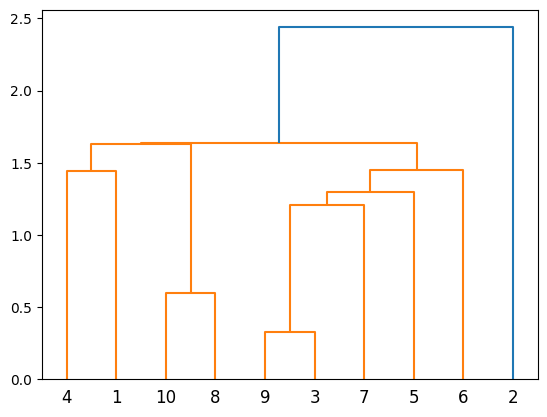

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendos = linkage(features, 'single')
annots = range(1, 11)
dendrogram(dendos, orientation='top',labels=annots, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# Training an agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

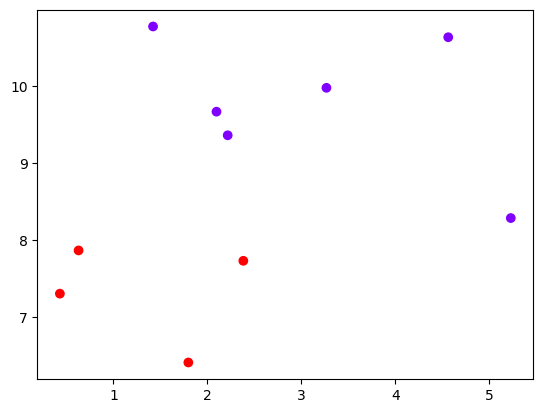

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=hc_model.labels_, cmap='rainbow')

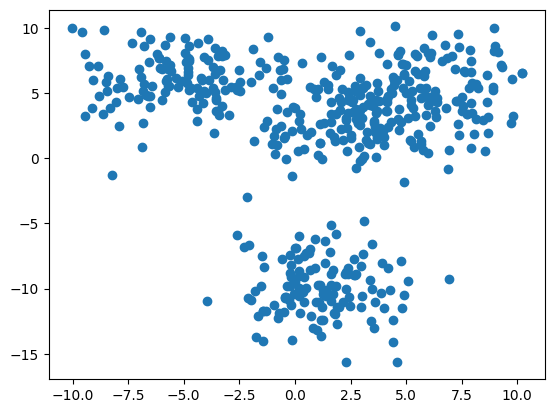

In [ ]:
features, labels = make_blobs(n_samples=500, centers=4, cluster_std=2.0)

# Plotting the dummy data
plt.scatter(features[:, 0], features[:, 1])

In [ ]:
hc_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([3, 2, 0, 2, 0, 0, 0, 3, 0, 2, 1, 2, 2, 1, 3, 0, 2, 0, 0, 3, 2, 2,
       2, 1, 2, 0, 0, 1, 2, 1, 3, 2, 2, 3, 0, 0, 3, 2, 1, 3, 1, 3, 2, 2,
       3, 2, 2, 3, 2, 0, 0, 3, 2, 3, 2, 1, 0, 0, 3, 2, 3, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 3, 1, 2, 2, 3, 0, 3, 1, 0, 2, 1,
       1, 1, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 3,
       1, 3, 2, 0, 1, 0, 2, 1, 3, 2, 1, 3, 1, 3, 2, 2, 0, 1, 2, 2, 3, 3,
       1, 2, 2, 2, 1, 1, 3, 3, 1, 0, 2, 2, 3, 2, 1, 2, 3, 0, 2, 0, 2, 0,
       3, 3, 1, 2, 2, 2, 0, 3, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 1, 1, 3, 0, 1, 3, 2, 2, 2, 0, 0, 2, 1, 3, 3, 0, 0, 2,
       1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 3, 1, 1, 2, 1, 1, 0, 0,
       0, 2, 3, 2, 3, 3, 1, 0, 2, 0, 3, 1, 0, 0, 1, 0, 2, 2, 3, 2, 3, 2,
       3, 0, 3, 1, 0, 0, 3, 2, 2, 3, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 3, 0,
       2, 2, 1, 3, 0, 2, 2, 3, 0, 0, 3, 0, 3, 0, 1, 1, 0, 1, 2, 0, 2, 0,
       3, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 3, 1, 1, 2,

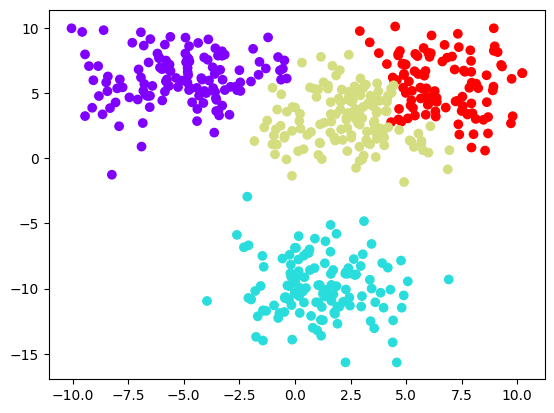

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=hc_model.labels_, cmap='rainbow')

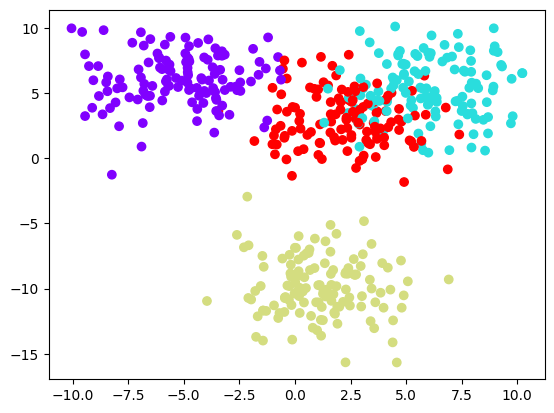

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='rainbow')

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
labels_num = le.fit_transform(labels)

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Calculating the adjusted rand index
print("ARI =", adjusted_rand_score(labels, hc_model.labels_))

ARI = 0.7882079313171388


In [ ]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
features = df.drop(["species"], axis=1)
labels = df.filter(["species"], axis=1)

features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Converting features to a NumPy array
features = features.values

# Training an agglomerative clustering model
hc_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_model.fit_predict(features)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
print(hc_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


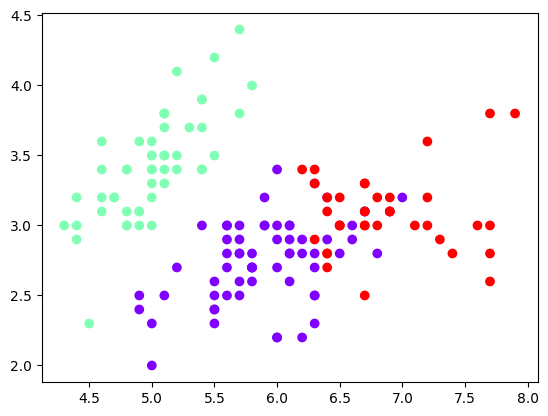

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=hc_model.labels_, cmap='rainbow')

In [ ]:
from sklearn import preprocessing

# Initialize the LabelEncoder
le = preprocessing.LabelEncoder()

# Fit and transform the labels
labels_num = le.fit_transform(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

# Calculate the Adjusted Rand Index (ARI)
print("ARI =", adjusted_rand_score(labels_num, hc_model.labels_))

ARI = 0.7311985567707746


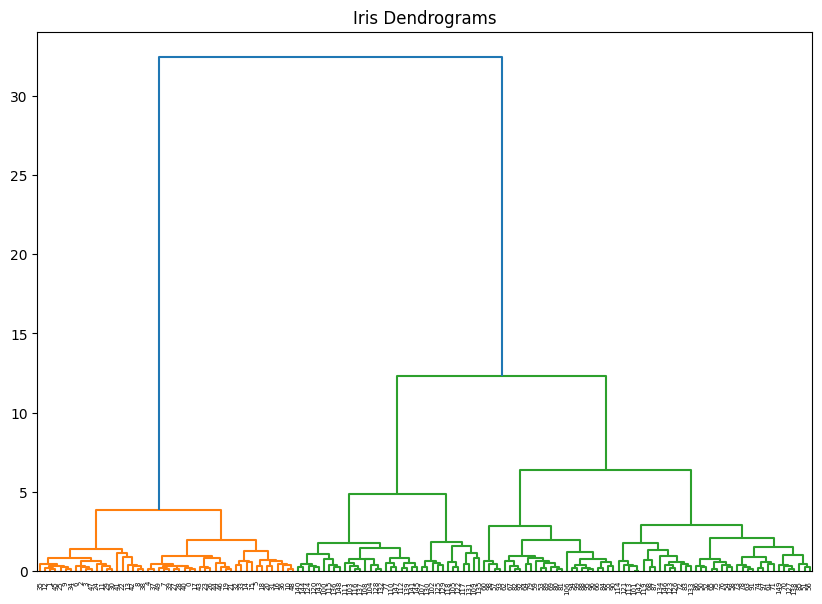

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))

# Set the title for the dendrogram
plt.title("Iris Dendrograms")

# Plot the dendrogram using Ward's method
dend = shc.dendrogram(shc.linkage(features, method='ward'))

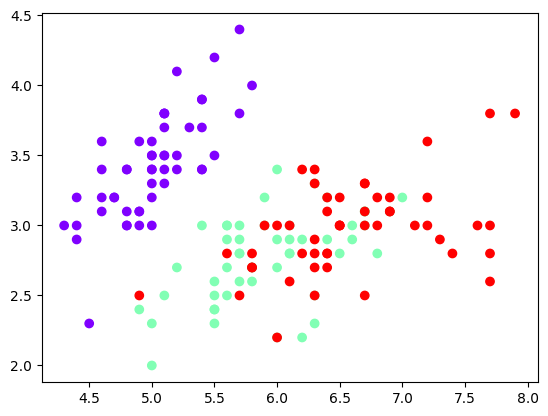

In [ ]:
plt.scatter(features[:, 0], features[:, 1], c=labels_num, cmap='rainbow')